In [33]:
%matplotlib inline

from collections import OrderedDict

import numpy as np
import pandas as pd
import xarray as xr

from string import ascii_uppercase

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os 

from IPython.display import display

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2,)
plt.rcParams.update({'mathtext.default':  'regular' })

colors = dict(zip(['D2009', '$RVIC_{1.1}$', '$RVIC_{2.0.a}$', '$RVIC_{2.0.b}$'], 
                  ["#95a5a6", "#0d0002", "#fa4e06", "#bb37da"]))

beg = '1990-01'
end = '1999-12'

In [43]:
dsets = OrderedDict()

dsets['obs'] = xr.open_dataset(os.path.join('/p/cwfs/gergel/compare_data/dai_trenberth_river', 
                                            'coastal-stns-Vol-monthly.updated-oct2007.nc'), 
                               decode_times=False).load()

dsets['RVIC 1.1_1010'] = xr.open_dataset(os.path.join('/p/cwfs/gergel/rvic/inputs', 
                                                'R1010RBRbaaa01a.rvic.h0i.2015-01-03-00-00-00.nc'))

dsets['RVIC 1.1_1009'] = xr.open_dataset(os.path.join('/p/cwfs/gergel/rvic/inputs', 
                                                'R1009RBRceap01a.rvic.h0i.2015-01-03-00-00-00.nc'))

dsets['RVIC 2.0.a'] = xr.open_dataset(os.path.join('/p/cwfs/gergel/rvic/inputs', 
                                                'R2100aRBRcaaa01a.rvic.h0i.2017-01-03-00-00-00.nc'))

dsets['RVIC 2.0.b'] = xr.open_dataset(os.path.join('/p/cwfs/gergel/rvic/inputs', 
                                                'R2100bRBRcaaa01a.rvic.h0i.2017-01-03-00-00-00.nc'))

obs_lookup = pd.read_table(os.path.join('/p/cwfs/gergel/compare_data/dai_trenberth_river', 
                                        'coastal-stns-byVol-updated-oct2007_clean.txt'))

obs_lookup.index = obs_lookup['River_Name']
obs_lookup = obs_lookup['No']

In [44]:
# Reformat the Simulated hydrographs
dframes = OrderedDict()
for sim in ['RVIC 1.1_1010', 'RVIC 1.1_1009', 'RVIC 2.0.a', 'RVIC 2.0.b']:
    dsets[sim].outlets.values = dsets[sim].outlet_name.values
    dframes[sim] = dsets[sim].streamflow.to_dataframe().unstack()['streamflow']
    dframes[sim].index = pd.date_range('1979-09-03', freq='D', periods=len(dframes[sim]))
    dframes[sim] = dframes[sim].resample('MS').mean()
    # dframes[sim].columns = [c.decode() for c in dframes[sim].columns]
    dframes[sim].columns = [c.decode() for c in dsets[sim].outlet_name.values]
    
#     dframes[sim].drop(['Pechora_at_Oksino_Rus'], axis=1, inplace=True)  # values are all near zero
    
# dframes[sim].head()

In [45]:
def get_rvic_river_name(outlet_name):
    return outlet_name.split('_')[0]

In [46]:
names = []
cols = []
for c in dframes[sim].columns:
    river = get_rvic_river_name(c)
    try:
        cols.append(obs_lookup.ix[river] - 1)
        names.append(c)
    except:
        print('failed for %s' % river)

failed for Severnaya
failed for GR
failed for Feuilles
failed for Melezes
failed for Baleine
failed for Hvita
failed for Shuchya
failed for Fish


/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [47]:
# Reformat the Observed hydrographs
dsets['obs']['time'] = pd.date_range(start='1900-01-01', end='2006-12-31', freq='MS')
dsets['obs'] = dsets['obs'].isel(station=cols)
dsets['obs'].station.values = names
dframes['obs'] = dsets['obs'].FLOW.to_dataframe().unstack()['FLOW']
dframes['obs'].head()

station,Alazeya_at_Andrushkino,Albany_at_nr_Hat_Isla,Alsek_at_nr_Yakutat,Amur_at_Komsomolsk,Anabar_at_Saskylakh,Anderson_at_ds_Carnwat,Attawapiskat_at_ds_Attawap,Back_at_us_Hermann,Bruara_at_Efstidalur,Burnside_at_nr_mouth,...,Tay_at_Ballathie,Taz_at_Sidorovsk,Tree_at_nr_mouth,Umba_at_Payalka,Varzuga_at_Varzuga,Voroniya_at_Serebryansk,Winisk_at_ds_Ashewei,Yana_at_Ubileynaya,Yenisey_at_Igarka_Rus,Yukon_at_Pilot_Stn
time,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,NaN,NaN,1459.695068,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-02-01,NaN,NaN,NaN,923.748169,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-01,NaN,NaN,NaN,828.575989,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-04-01,NaN,NaN,NaN,2086.660645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-05-01,NaN,NaN,NaN,14597.450195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# plot specs 
dpi = 300

figures with RASM 1010 run 

In [53]:
from matplotlib import gridspec
sns.set_style('whitegrid')

def plot_river_timeseries(rivers, scale=1000., beg='1990-01', end='1999-12', figsize=(10, 12)):

    if not scale:
        scale = 1
    j = 0
    
    fig = plt.figure(figsize=figsize) 
    gs = gridspec.GridSpec(len(rivers), 2, width_ratios=[3, 1]) 

    bot_ax1 = plt.subplot(gs[-1, 0])
    bot_ax2 = plt.subplot(gs[-1, 1])

    for i, river in enumerate(rivers):

        data = OrderedDict()
        data['$RVIC_{1.1}$'] = dframes['RVIC 1.1_1010'][river][beg:end]
        data['$RVIC_{2.0.a}$'] = dframes['RVIC 2.0.a'][river][beg:end]
        data['$RVIC_{2.0.b}$'] = dframes['RVIC 2.0.b'][river][beg:end]
        data['D2009'] = dframes['obs'][river][beg:end]
        
        df = pd.DataFrame(data)[beg:end]
        # time series
        ax1 = plt.subplot(gs[i, 0], sharex=bot_ax1)
        for k, s in data.items():
            (s / scale).plot(ax=ax1, legend=False, color=colors[k], label=k)
        riv = river.split('_')[0]
        if scale != 1:
            ax1.set_ylabel('Q $({:,}\ m^3/s)$'.format(int(scale)))
        else:
            ax1.set_ylabel('%s\nQ $(m^3/s)$' % riv)
        ax1.set_title('%s River' % riv)
            
        # annual cycle
        ax2 = plt.subplot(gs[i, 1], sharey=ax1, sharex=bot_ax2)
        df_drop = df.dropna()
        for k, s in data.items():
            s_group = (s / scale).groupby(lambda x: x.month) 
            m = s_group.mean()
            std = s_group.std()
            m.plot(ax=ax2, color=colors[k], label=k)
            ax2.fill_between(m.index, m + std/2, m - std/2, color=colors[k], alpha=0.3)
        if i == 0:
            ax1.legend(loc='upper center', ncol=4, frameon=True)
        
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

    gs.tight_layout(fig, pad=1.01)
        
    return fig, gs

all hydrographs, RASM 1010

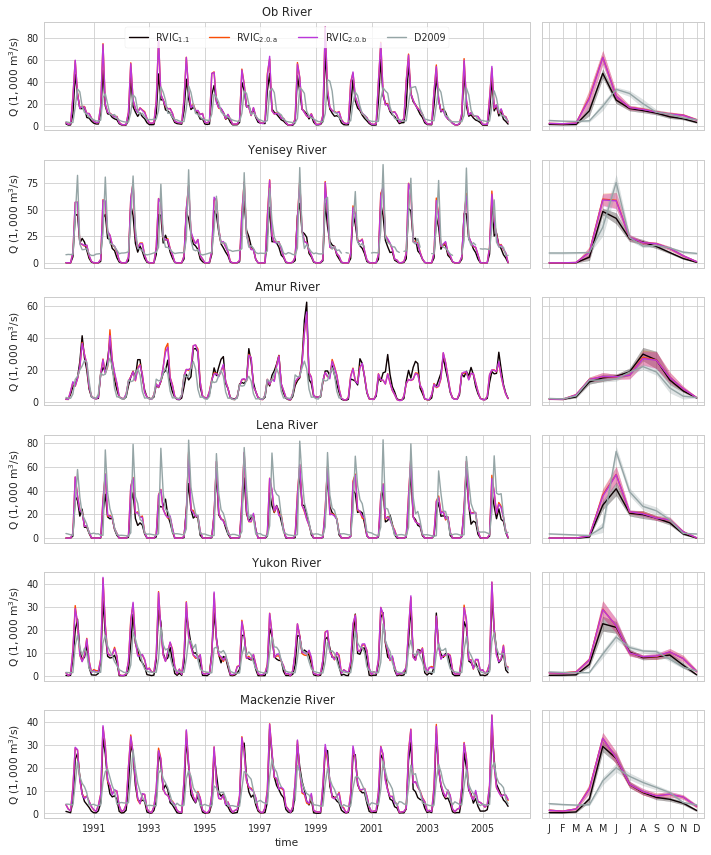

In [54]:
rivers = ['Ob_at_Salekhard', 'Yenisey_at_Igarka_Rus', 'Amur_at_Komsomolsk',
          'Lena_at_Kusur_Russ', 'Yukon_at_Pilot_Stn', 'Mackenzie_at_Arctic_Red']

fig, gs = plot_river_timeseries(rivers, end='2005')

fig.savefig(os.path.join('/u/home/gergel/rasm_postprocessing/plots_runoff_analysis/', 
            'rvic_hydrographs_rasm1010.png'), dpi=dpi, bbox_inches='tight')

In [55]:
def plot_river_timeseries(rivers, scale=1000., beg='1990-01', end='1999-12', figsize=(10, 12)):

    if not scale:
        scale = 1
    j = 0
    
    fig = plt.figure(figsize=figsize) 
    gs = gridspec.GridSpec(len(rivers), 2, width_ratios=[3, 1]) 

    bot_ax1 = plt.subplot(gs[-1, 0])
    bot_ax2 = plt.subplot(gs[-1, 1])

    for i, river in enumerate(rivers):

        data = OrderedDict()
        data['$RVIC_{1.1}$'] = dframes['RVIC 1.1_1010'][river][beg:end]
        data['$RVIC_{2.0.a}$'] = dframes['RVIC 2.0.a'][river][beg:end]
        data['$RVIC_{2.0.b}$'] = dframes['RVIC 2.0.b'][river][beg:end]
        # data['D2009'] = dframes['obs'][river][beg:end]
        
        df = pd.DataFrame(data)[beg:end]
        # time series
        ax1 = plt.subplot(gs[i, 0], sharex=bot_ax1)
        for k, s in data.items():
            (s / scale).plot(ax=ax1, legend=False, color=colors[k], label=k)
        riv = river.split('_')[0]
        if scale != 1:
            ax1.set_ylabel('Q $({:,}\ m^3/s)$'.format(int(scale)))
        else:
            ax1.set_ylabel('%s\nQ $(m^3/s)$' % riv)
        ax1.set_title('%s River' % riv)
            
        # annual cycle
        ax2 = plt.subplot(gs[i, 1], sharey=ax1, sharex=bot_ax2)
        df_drop = df.dropna()
        for k, s in data.items():
            s_group = (s / scale).groupby(lambda x: x.month) 
            m = s_group.mean()
            std = s_group.std()
            m.plot(ax=ax2, color=colors[k], label=k)
            ax2.fill_between(m.index, m + std/2, m - std/2, color=colors[k], alpha=0.3)
        if i == 0:
            ax1.legend(loc='upper center', ncol=3, frameon=True)
        
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

    gs.tight_layout(fig, pad=1.01)
        
    return fig, gs

model only, RASM 1010

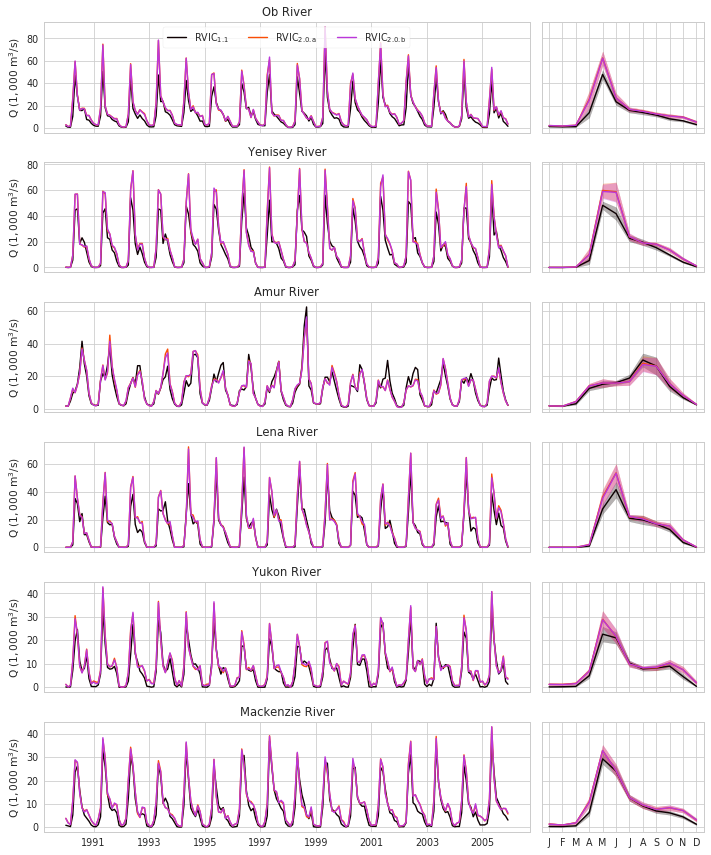

In [56]:
rivers = ['Ob_at_Salekhard', 'Yenisey_at_Igarka_Rus', 'Amur_at_Komsomolsk',
          'Lena_at_Kusur_Russ', 'Yukon_at_Pilot_Stn', 'Mackenzie_at_Arctic_Red']

fig, gs = plot_river_timeseries(rivers, end='2005')

fig.savefig(os.path.join('/u/home/gergel/rasm_postprocessing/plots_runoff_analysis/', 
            'rvic_modelonly_hydrographs_rasm1010.png'), dpi=dpi, bbox_inches='tight')

In [57]:
def plot_river_timeseries(rivers, scale=1000., beg='1990-01', end='1999-12', figsize=(10, 12)):

    if not scale:
        scale = 1
    j = 0
    
    fig = plt.figure(figsize=figsize) 
    gs = gridspec.GridSpec(len(rivers), 2, width_ratios=[3, 1]) 

    bot_ax1 = plt.subplot(gs[-1, 0])
    bot_ax2 = plt.subplot(gs[-1, 1])

    for i, river in enumerate(rivers):

        data = OrderedDict()
        # data['$RVIC_{1.1}$'] = dframes['RVIC 1.1'][river][beg:end]
        data['$RVIC_{2.0.a}$'] = dframes['RVIC 2.0.a'][river][beg:end]
        data['$RVIC_{2.0.b}$'] = dframes['RVIC 2.0.b'][river][beg:end]
        data['D2009'] = dframes['obs'][river][beg:end]
        
        df = pd.DataFrame(data)[beg:end]
        # time series
        ax1 = plt.subplot(gs[i, 0], sharex=bot_ax1)
        for k, s in data.items():
            (s / scale).plot(ax=ax1, legend=False, color=colors[k], label=k)
        riv = river.split('_')[0]
        if scale != 1:
            ax1.set_ylabel('Q $({:,}\ m^3/s)$'.format(int(scale)))
        else:
            ax1.set_ylabel('%s\nQ $(m^3/s)$' % riv)
        ax1.set_title('%s River' % riv)
            
        # annual cycle
        ax2 = plt.subplot(gs[i, 1], sharey=ax1, sharex=bot_ax2)
        df_drop = df.dropna()
        for k, s in data.items():
            s_group = (s / scale).groupby(lambda x: x.month) 
            m = s_group.mean()
            std = s_group.std()
            m.plot(ax=ax2, color=colors[k], label=k)
            ax2.fill_between(m.index, m + std/2, m - std/2, color=colors[k], alpha=0.3)
        if i == 0:
            ax1.legend(loc='upper center', ncol=3, frameon=True)
        
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

    gs.tight_layout(fig, pad=1.01)
        
    return fig, gs

RASM 2.1a and 2.1b with obs 

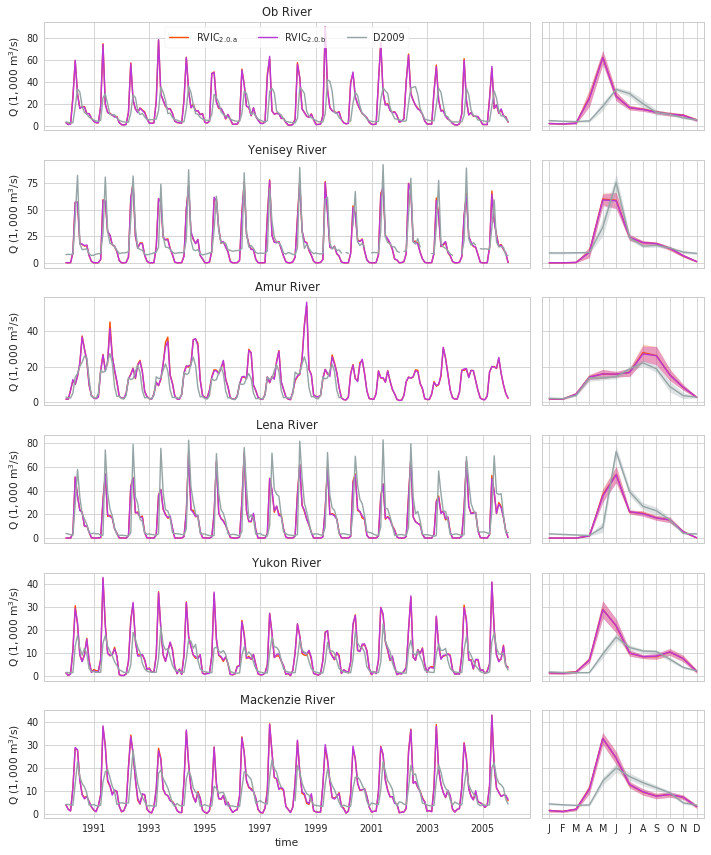

In [58]:
rivers = ['Ob_at_Salekhard', 'Yenisey_at_Igarka_Rus', 'Amur_at_Komsomolsk',
          'Lena_at_Kusur_Russ', 'Yukon_at_Pilot_Stn', 'Mackenzie_at_Arctic_Red']

fig, gs = plot_river_timeseries(rivers, end='2005')

fig.savefig(os.path.join('/u/home/gergel/rasm_postprocessing/plots_runoff_analysis/', 
            'rvic_rasm2withobs_hydrographs.png'), dpi=dpi, bbox_inches='tight')

In [59]:
from matplotlib import gridspec
sns.set_style('whitegrid')

def plot_river_timeseries(rivers, scale=1000., beg='1990-01', end='1999-12', figsize=(10, 12)):

    if not scale:
        scale = 1
    j = 0
    
    fig = plt.figure(figsize=figsize) 
    gs = gridspec.GridSpec(len(rivers), 2, width_ratios=[3, 1]) 

    bot_ax1 = plt.subplot(gs[-1, 0])
    bot_ax2 = plt.subplot(gs[-1, 1])

    for i, river in enumerate(rivers):

        data = OrderedDict()
        data['$RVIC_{1.1}$'] = dframes['RVIC 1.1_1009'][river][beg:end]
        data['$RVIC_{2.0.a}$'] = dframes['RVIC 2.0.a'][river][beg:end]
        data['$RVIC_{2.0.b}$'] = dframes['RVIC 2.0.b'][river][beg:end]
        data['D2009'] = dframes['obs'][river][beg:end]
        
        df = pd.DataFrame(data)[beg:end]
        # time series
        ax1 = plt.subplot(gs[i, 0], sharex=bot_ax1)
        for k, s in data.items():
            (s / scale).plot(ax=ax1, legend=False, color=colors[k], label=k)
        riv = river.split('_')[0]
        if scale != 1:
            ax1.set_ylabel('Q $({:,}\ m^3/s)$'.format(int(scale)))
        else:
            ax1.set_ylabel('%s\nQ $(m^3/s)$' % riv)
        ax1.set_title('%s River' % riv)
            
        # annual cycle
        ax2 = plt.subplot(gs[i, 1], sharey=ax1, sharex=bot_ax2)
        df_drop = df.dropna()
        for k, s in data.items():
            s_group = (s / scale).groupby(lambda x: x.month) 
            m = s_group.mean()
            std = s_group.std()
            m.plot(ax=ax2, color=colors[k], label=k)
            ax2.fill_between(m.index, m + std/2, m - std/2, color=colors[k], alpha=0.3)
        if i == 0:
            ax1.legend(loc='upper center', ncol=4, frameon=True)
        
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

    gs.tight_layout(fig, pad=1.01)
        
    return fig, gs

all hydrographs with RASM 1009

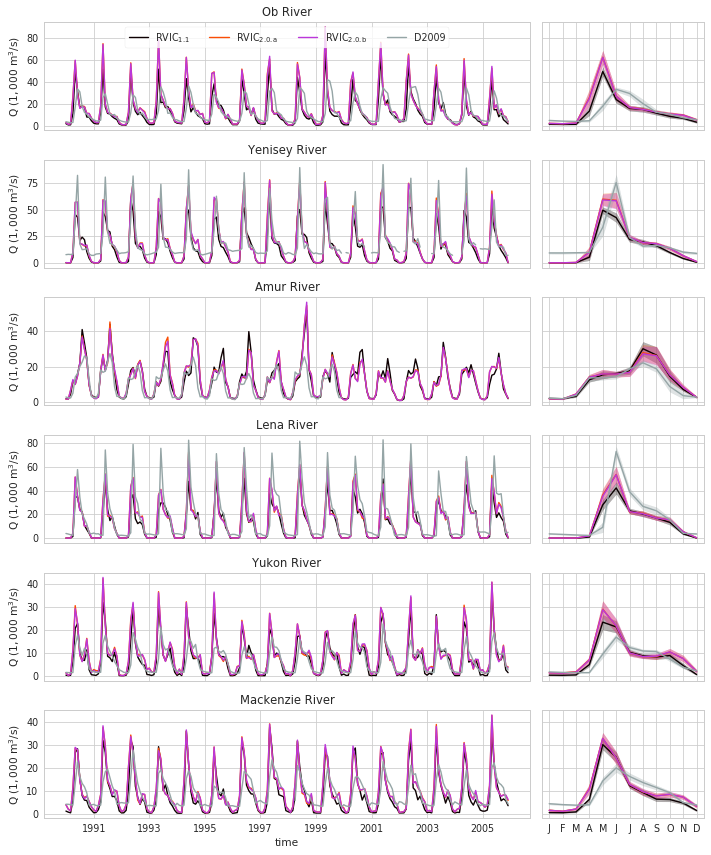

In [60]:
rivers = ['Ob_at_Salekhard', 'Yenisey_at_Igarka_Rus', 'Amur_at_Komsomolsk',
          'Lena_at_Kusur_Russ', 'Yukon_at_Pilot_Stn', 'Mackenzie_at_Arctic_Red']

fig, gs = plot_river_timeseries(rivers, end='2005')

fig.savefig(os.path.join('/u/home/gergel/rasm_postprocessing/plots_runoff_analysis/', 
            'rvic_hydrographs_rasm1009.png'), dpi=dpi, bbox_inches='tight')

In [61]:
def plot_river_timeseries(rivers, scale=1000., beg='1990-01', end='1999-12', figsize=(10, 12)):

    if not scale:
        scale = 1
    j = 0
    
    fig = plt.figure(figsize=figsize) 
    gs = gridspec.GridSpec(len(rivers), 2, width_ratios=[3, 1]) 

    bot_ax1 = plt.subplot(gs[-1, 0])
    bot_ax2 = plt.subplot(gs[-1, 1])

    for i, river in enumerate(rivers):

        data = OrderedDict()
        data['$RVIC_{1.1}$'] = dframes['RVIC 1.1_1009'][river][beg:end]
        data['$RVIC_{2.0.a}$'] = dframes['RVIC 2.0.a'][river][beg:end]
        data['$RVIC_{2.0.b}$'] = dframes['RVIC 2.0.b'][river][beg:end]
        # data['D2009'] = dframes['obs'][river][beg:end]
        
        df = pd.DataFrame(data)[beg:end]
        # time series
        ax1 = plt.subplot(gs[i, 0], sharex=bot_ax1)
        for k, s in data.items():
            (s / scale).plot(ax=ax1, legend=False, color=colors[k], label=k)
        riv = river.split('_')[0]
        if scale != 1:
            ax1.set_ylabel('Q $({:,}\ m^3/s)$'.format(int(scale)))
        else:
            ax1.set_ylabel('%s\nQ $(m^3/s)$' % riv)
        ax1.set_title('%s River' % riv)
            
        # annual cycle
        ax2 = plt.subplot(gs[i, 1], sharey=ax1, sharex=bot_ax2)
        df_drop = df.dropna()
        for k, s in data.items():
            s_group = (s / scale).groupby(lambda x: x.month) 
            m = s_group.mean()
            std = s_group.std()
            m.plot(ax=ax2, color=colors[k], label=k)
            ax2.fill_between(m.index, m + std/2, m - std/2, color=colors[k], alpha=0.3)
        if i == 0:
            ax1.legend(loc='upper center', ncol=3, frameon=True)
        
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

    gs.tight_layout(fig, pad=1.01)
        
    return fig, gs

model only hydrographs, RASM 1009

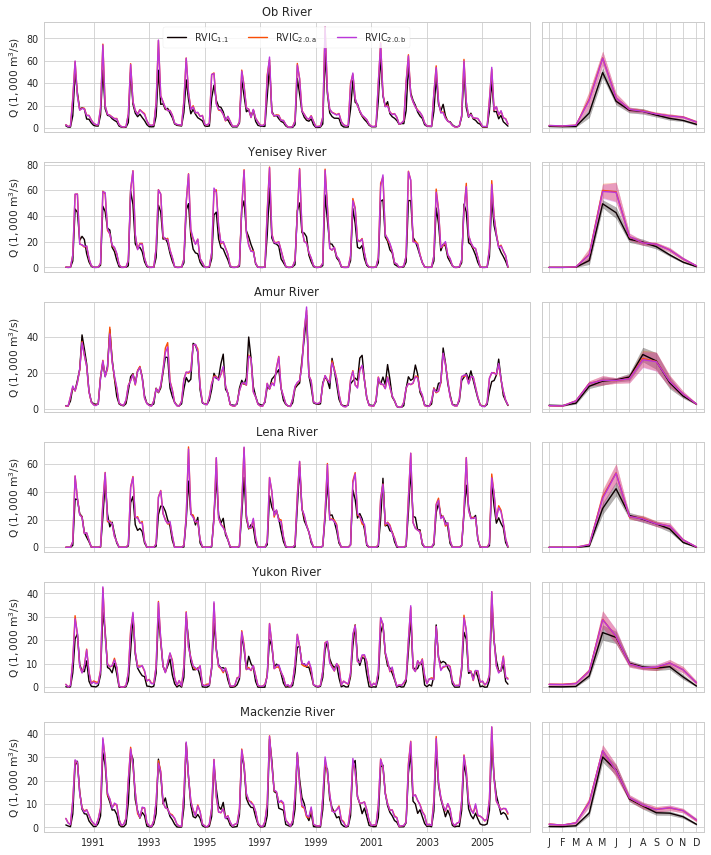

In [62]:
rivers = ['Ob_at_Salekhard', 'Yenisey_at_Igarka_Rus', 'Amur_at_Komsomolsk',
          'Lena_at_Kusur_Russ', 'Yukon_at_Pilot_Stn', 'Mackenzie_at_Arctic_Red']

fig, gs = plot_river_timeseries(rivers, end='2005')

fig.savefig(os.path.join('/u/home/gergel/rasm_postprocessing/plots_runoff_analysis/', 
            'rvic_modelonly_hydrographs_rasm1009.png'), dpi=dpi, bbox_inches='tight')